In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0,"../common_python")
from common_python.tellurium.experiment_runner import ExperimentRunner
from common_python.tellurium.model import Model

In [2]:
model_str1 = """
     A -> B; k1*A
     B-> C; k2*B
      
     A = 50; 
     B = 0;
     C = 0;
     k1 = 0.15
     k2 = 0.2
"""
model_str2 = """
     A -> B+C; k1*A
      
     A = 50; 
     B = 0;
     C = 0;
     k1 = 0.15
"""
model_str3 = """
     A -> B; k3*A
     A-> C; k4*A
      
     A = 50; 
     B = 0;
     C = 0;
     k3 = 0.2
     k4 = 0.02
"""

simulation_time = 30
num_points = 10

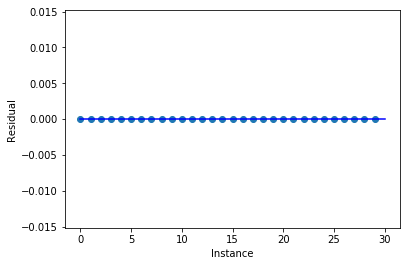

In [3]:
model = Model(model_str1, ['k1', 'k2'], simulation_time, num_points)
df, _ = model.runSimulation()
model.plotResiduals(df)


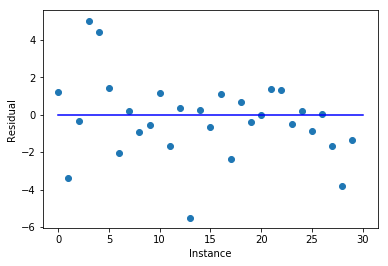

2.079525670043164


In [4]:
runner = ExperimentRunner(model_str1, ['k1', 'k2'], simulation_time, num_points,
                         noise_std=2)
df_obs, ser_time = runner.makeObservations()
runner.plotResiduals(df_obs)
print(np.std(runner.calcResiduals(df_obs)))

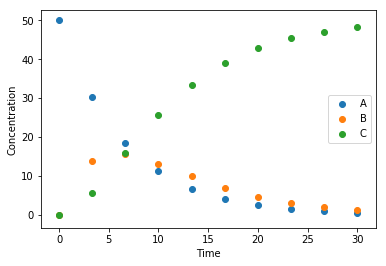

In [10]:
runner.plotData(is_scatter=True)

In [6]:
len(runner.ser_time)

10

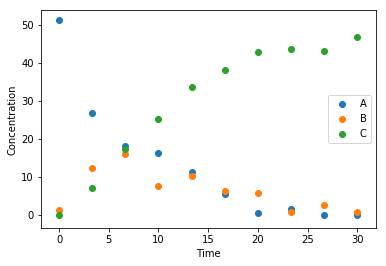

In [9]:
runner.plotData(df_observation=df_obs, is_scatter=True)

In [8]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
print(model_str1)
runner = ExperimentRunner(model_str1, ['k1', 'k2'],
                    simulation_time, num_points)
runner.fit(count=10, method='differential_evolution')

In [ ]:
print(model_str2)
runner = ExperimentRunner(model_str2, ['k1'],
                    simulation_time, num_points)
runner.fit(count=10)

In [ ]:
print(model_str3)
runner = ExperimentRunner(model_str3, ['k3', 'k4'],
                    simulation_time, simulation_time)
runner.fit(count=5, method="differential_evolution")

In [ ]:
print(model_str3)
runner = ExperimentRunner(model_str3, ['k3', 'k4'],
                    simulation_time, simulation_time, noise_std=1.0)
runner.fit(count=5, method="differential_evolution")